In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

import os
import pickle
import numpy as np
import PIL.Image
import dnnlib
import dnnlib.tflib as tflib
import config


In [3]:
g=joblib.load("/datadrive/birds/git_cloned/stylegan/results/00006-sgan-custom_dataset-4gpu/network-snapshot-025000.pkl")

NameError: name 'joblib' is not defined

In [4]:
tflib.init_tf()

# Load pre-trained network.
url = "/datadrive/birds/git_cloned/stylegan/results/00006-sgan-custom_dataset-4gpu/network-snapshot-025000.pkl" # karras2019stylegan-ffhq-1024x1024.pkl
from training import misc
inception = misc.load_pkl(url)

In [5]:
type(inception),len(inception)

(tuple, 3)

In [6]:
_G, _D, Gs = inception
        # _G = Instantaneous snapshot of the generator. Mainly useful for resuming a previous training run.
        # _D = Instantaneous snapshot of the discriminator. Mainly useful for resuming a previous training run.
        # Gs = Long-term average of the generator. Yields higher-quality results than the instantaneous snapshot.

In [7]:
type(Gs)

dnnlib.tflib.network.Network

In [8]:
Gs.print_layers()


Gs                            Params    OutputShape         WeightShape     
---                           ---       ---                 ---             
latents_in                    -         (?, 512)            -               
labels_in                     -         (?, 0)              -               
lod                           -         ()                  -               
dlatent_avg                   -         (512,)              -               
G_mapping/latents_in          -         (?, 512)            -               
G_mapping/labels_in           -         (?, 0)              -               
G_mapping/PixelNorm           -         (?, 512)            -               
G_mapping/Dense0              262656    (?, 512)            (512, 512)      
G_mapping/Dense1              262656    (?, 512)            (512, 512)      
G_mapping/Dense2              262656    (?, 512)            (512, 512)      
G_mapping/Dense3              262656    (?, 512)            (512, 512)     

In [9]:
rnd = np.random.RandomState(5)
latents = rnd.randn(1, Gs.input_shape[1])

In [10]:
fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
images = Gs.run(latents, None, truncation_psi=0.7, randomize_noise=True, output_transform=fmt)

In [11]:
images.shape

(1, 256, 256, 3)

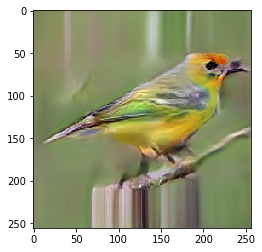

In [12]:
plt.imshow(images[0])

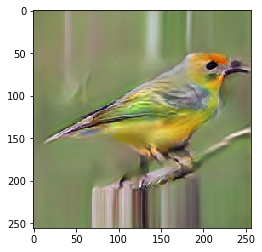

In [28]:
rnd = np.random.RandomState(5)
latents = rnd.randn(1, Gs.input_shape[1])
fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
images = Gs.run(latents, None, truncation_psi=0.7, randomize_noise=True, output_transform=fmt)
plt.imshow(images[0])

38

5583


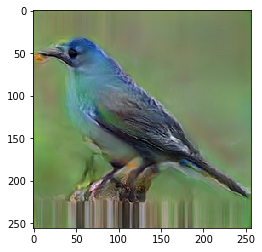

In [155]:
state=int(np.random.random()*10000)
print(state)
rnd = np.random.RandomState(state)
latents2 = rnd.randn(1, Gs.input_shape[1])
fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
images = Gs.run(latents2, None, truncation_psi=0.7, randomize_noise=True, output_transform=fmt)
plt.imshow(images[0])

835


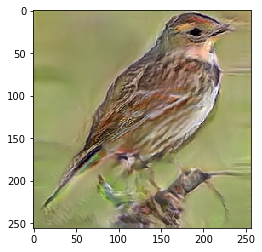

In [59]:
state=int(np.random.random()*1000)
print(state)
rnd = np.random.RandomState(state)
latents3 = rnd.randn(1, Gs.input_shape[1])
fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
images = Gs.run(latents3, None, truncation_psi=0.7, randomize_noise=True, output_transform=fmt)
plt.imshow(images[0])

466


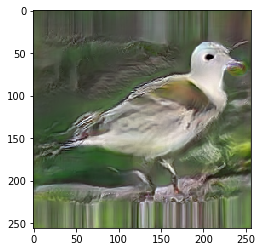

In [93]:
state=int(np.random.random()*1000)
print(state)
rnd = np.random.RandomState(state)
latents4 = rnd.randn(1, Gs.input_shape[1])
fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
images = Gs.run(latents4, None, truncation_psi=0.7, randomize_noise=True, output_transform=fmt)
plt.imshow(images[0])

441


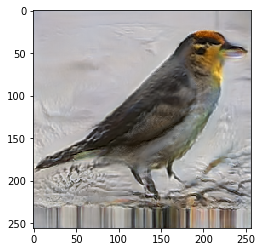

In [137]:
state=int(np.random.random()*1000)
print(state)
rnd = np.random.RandomState(state)
latents5 = rnd.randn(1, Gs.input_shape[1])
fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
images = Gs.run(latents5, None, truncation_psi=0.7, randomize_noise=True, output_transform=fmt)
plt.imshow(images[0])

In [156]:
def interpolate_points(p1, p2, n_steps=10):
	# interpolate ratios between the points
	ratios = np.linspace(0, 1, num=n_steps)
	# linear interpolate vectors
	vectors = list()
	for ratio in ratios:
		v = (1.0 - ratio) * p1 + ratio * p2
		vectors.append(v)
	return np.asarray(vectors)

In [157]:
if stacks:
    print("asd")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [158]:
ls=[latents,latents2,latents3,latents4,latents5]
stacks=np.array([])
for i,l in enumerate(ls):
    if (i+1==len(ls)):
        stack=interpolate_points(ls[-1],ls[0],100)
    else:
        stack=interpolate_points(ls[i],ls[i+1],100)
    print(stack.shape)
    if len(stacks)==0:
        stacks=stack
    else:      
        stacks=np.vstack((stacks,stack))
    print(stacks.shape)

(100, 1, 512)
(100, 1, 512)
(100, 1, 512)
(200, 1, 512)
(100, 1, 512)
(300, 1, 512)
(100, 1, 512)
(400, 1, 512)
(100, 1, 512)
(500, 1, 512)


In [159]:
stacks.shape

(500, 1, 512)

In [160]:
ints=interpolate_points(latents,latents2,100)
ints.shape

(100, 1, 512)

In [161]:
import matplotlib.animation as animation
# from pyvirtualdisplay import Display

# virtual_display = Display(visible=0, size=(1400, 900))
# virtual_display.start()

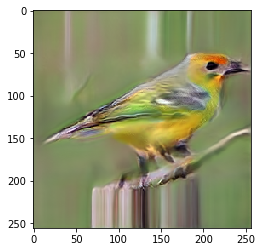

In [162]:
fig = plt.figure()
ims=[]
for l in stacks:
    fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
    images = Gs.run(l, None, truncation_psi=0.7, randomize_noise=True, output_transform=fmt)
    im =plt.imshow(images[0], animated=True)
    # plt.show()
    ims.append([im])

In [164]:
ani = animation.ArtistAnimation(fig, ims, interval=200, blit=True,
                                repeat_delay=0)

ani.save('dynamic_images_2_low.gif')
plt.show()

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
